<a href="https://colab.research.google.com/github/XieSandi/DicodingMLCourse-Exercise/blob/main/example%20form%20Shofi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membuat CNN(Convolutional Neural Network) untuk mengenali bentuk tangan yang membentuk PAPER ROCK dan SCISSOR.
NAMA   : Shofiyurrohman Al At sariy

E-MAIL : rohmanal83@gmail.com

KELAS  : MACHINE LEARNING UNTUK PEMULA

datasets : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


**1.IMPORTING LIBRARY yang dibutuhkan**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import os
import zipfile
print(tf.__version__)

2.3.0


**2. Loading dataset**

a. Downloading

checking directory if its exist

In [ ]:
path = '/tmp/rockpaperscissors/'
    
isFile = os.path.isfile(path)  
print(isFile) 

False


cleaning directory before *downloading*

In [ ]:
if isFile == True:
    shutil.rmtree('/tmp/rockpaperscissors/', ignore_errors=False, onerror=None)
else:
   print('skipped')

skipped


In [ ]:
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

/: Scheme missing.
--2020-10-22 05:38:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  12.0MB/s    in 34s     

2020-10-22 05:38:40 (9.05 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

FINISHED --2020-10-22 05:38:40--
Total wall clock time: 35s
Downloaded: 1 files, 308M in 34s (9.05 MB/s)


checking if directory is cleaned

In [ ]:
os.listdir('/tmp/')

[]

b. Extracting file

In [ ]:
#Extreacting zip file
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/'
train_dir = os.path.join(base_dir, 'rps-cv-images')

Checking directory

In [ ]:
os.listdir(base_dir)

['rock', 'paper', 'scissors', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [ ]:
os.listdir(train_dir)

['rock', 'paper', 'scissors', 'README_rpc-cv-images.txt']

**3. DATA PREPROCESSING**

Image Augmentation Prepraring and SET Splitting data for validation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4) # Data validation 0.4(40%)
    
validation_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4) # Data validation 0.4(40%)

Object Image Data Generator process and Splitting data into training and validation

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**4. LEARNING PROCESS**

creating CNN arcitecture

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

Calling compile func, defining loss and optimizer

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

fitting/Training process

In [ ]:
model.fit(
    train_generator,  
    epochs=15,
    validation_data=validation_generator, 
    shuffle=True,
    verbose=1
)

Epoch 1/15
329/329 [==============================] - 125s 380ms/step - loss: 0.7726 - accuracy: 0.6339 - val_loss: 0.5240 - val_accuracy: 0.7883
Epoch 2/15
329/329 [==============================] - 123s 375ms/step - loss: 0.3692 - accuracy: 0.8714 - val_loss: 0.3280 - val_accuracy: 0.9108
Epoch 3/15
329/329 [==============================] - 125s 380ms/step - loss: 0.3385 - accuracy: 0.8874 - val_loss: 0.1728 - val_accuracy: 0.9439
Epoch 4/15
329/329 [==============================] - 127s 387ms/step - loss: 0.3121 - accuracy: 0.9132 - val_loss: 0.2536 - val_accuracy: 0.9199
Epoch 5/15
329/329 [==============================] - 124s 377ms/step - loss: 0.2534 - accuracy: 0.9178 - val_loss: 0.2366 - val_accuracy: 0.9462
Epoch 6/15
329/329 [==============================] - 123s 375ms/step - loss: 0.2320 - accuracy: 0.9368 - val_loss: 0.1517 - val_accuracy: 0.9554
Epoch 7/15
329/329 [==============================] - 124s 378ms/step - loss: 0.2682 - accuracy: 0.9437 - val_loss: 0.2317 -

**5. PREDICTING**


Creating uploader for custom file predicting that we can uploaded into colab.

Saving rsz_kertas5.png to rsz_kertas5.png


Predict RESULT
rsz_kertas5.png
[[1. 0. 0.]]
paper


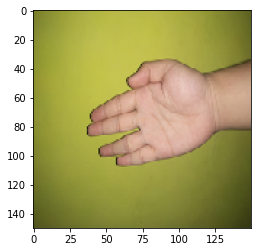

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #String output template
  paper     = "[[1. 0. 0.]]"
  rock      = "[[0. 1. 0.]]"
  scissors  = "[[0. 0. 1.]]"
  
  #convert numpy array into string
  result = np.array_str(classes) 
  
  
  print('\n')
  print('Predict RESULT')
  print(fn)
  print(result)


  #Changing result into human language
  if result == paper :
     print("paper")
  elif result == rock :
     print("rock")
  elif result == scissors :
     print("scissors")
  else :
     print("[[%PAPER. %ROCK. %SCISSORS]]")